# DSC 170 Final Project: An Analysis of United States Housing

Team member names:
- Jayson Leach (A16469391)
- Sheena Patel (A16641602)

## Questions addressed:

We want to identify locations in the US that are most suitable for homebuyers, which we are likely to be in the near future. Where is it most affordable to live? What areas are likely to increase in price over the next few years? What areas have a low ratio of housing cost to income?

As stated above, the expected audience is future homebuyers with plans on relocating. This is for recent college graduates and people early into their career. Additionally, it could be used by those generally looking to relocate within the US. This is beneficial, because it can provide sets of potential locations filtered by different sets of important criteria. 

(250 words)

## Background and literature:
First, we plan to conduct our data exploration to find regions that may be preferred to live for homebuyers and check our findings and dive deep through online census comparisons. If we find certain concentrations of things such as crime rates, we want to utilize sources online to explain why crime may or may not be higher in those regions and provide justification to our findings. 

Here are some source we could begin with (subject to change depending on our project results): 
- https://www.census.gov/quickfacts/fact/table/CA,US/RHI225222 
- https://www.census.gov/library/visualizations/interactive/monthly-state-retail-sales.html 

(200 words)

Before selecting our data, we relied on articles, like [this from Money Crashers](https://www.moneycrashers.com/where-should-i-live-decide-best-places/), to inform us on what criteria homebuyers use when searching for places to live. This helped us identify factors like climate, crime, commute times, and education quality in addition to the logical financial incentives like job opportunities, housing cost, cost of living, etc. Though some of these factors did not make it into our analyses, it did help us narrow our search on what data is relevant.

By professor recommendation, we investigated existing data analysis by [Redfin](https://www.redfin.com/news/data-center/). This investigation led us to consider entirely new factors. Redfin has extensive data on job opportunities and provides job opportunity scores to metropolitan areas by the field of work. Additionally, they also have data on market competitiveness, which is something we did not consider. Some places have more people looking to buy homes than others. Our investigation of Redfin housing market data allowed us to see the vast number of directions we could take this project.

## Python libraries or ArcGIS modules
- GeoPandas / Pandas: Enables manipulation and analysis of dataframes and geospatial data.
- ArcGIS: Allows interaction with spatial data and leveraging the powerful geoprocessing tools of ArcGIS for in-depth analysis.

(100 words)

In [1]:
# imports
import pandas as pd
import os
import geopandas 
from geopandas.tools import geocode
import getpass
import geopy
import geopandas as gpd
from shapely.geometry import Point
from arcgis.gis import GIS
from arcgis import features
from arcgis.features import FeatureLayer, FeatureSet
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import cenpy
import time

# warnings
import warnings
warnings.filterwarnings('ignore')

## Data Sources

- [Esri Updated Demographics Variables 2023](https://ucsdonline.maps.arcgis.com/home/item.html?id=ddd1510ed1964e2e8fb1ded93e9b03b1): This dataset contains over 150 popular demographic metrics by areas as small as census tracts. We plan to use metrics such as Housing Affordability Index, Unemployment Rate, Median Home Value, among others.
- [Mean Commute Time by State 2022](https://www.census.gov/csrm/comparisons/sorted-list.html): This dataset by the US Census contains the mean travel time to work in minutes by state from 2022.
- [World Historical Climate Monthly Averages 1981-2010](https://ucsdonline.maps.arcgis.com/home/item.html?id=ed59d3b4a8c44100914458dd722f054f): This dataset contains the average monthly temperature over 30 years at various locations globally.

## Data Cleaning

Describe the cleaning/wrangling operations that you performed, and whether you realized you needed to clean the data by examining metadata documents or by introspecting the data itself. Was the amount of cleaning/data preparation similar to what you expected when writing project proposal?
Organize the discussion and code as a combination of markdown and code cells.
(100 words)

In [2]:
# username = input('Enter username: ')
# password = getpass.getpass("Enter password: ")
# gis = GIS(username=username, password=password)

# temporary
gis = GIS("https://ucsdonline.maps.arcgis.com/home", username='dsc170wi24_29', password='Nanu262!')

<Item title:"Esri Updated Demographics Variables 2023" type:Feature Layer Collection owner:esri_demographics>
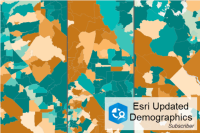

In [3]:
# Get Esri Demographic Variables 2023
dem_id = 'ddd1510ed1964e2e8fb1ded93e9b03b1'
dem = gis.content.get(dem_id)
display(dem)

In [4]:
# See all feature layers
for lyr in dem.layers:
    print(lyr.properties.name)

Country
State
Congressional District
County
Tract


In [5]:
# Access the feature layer at county level
dem_layer = dem.layers[3]
dem_sdf = dem_layer.query().sdf

# to geodataframe
dem_gdf = geopandas.GeoDataFrame(dem_sdf, geometry= dem_sdf['SHAPE'], crs="EPSG:2263")
dem_gdf = dem_gdf.to_crs('epsg:4326')
dem_gdf.head()

,OBJECTID,ID,NAME,ST_ABBREV,STATE_NAME,TOTPOP_CY,HHPOP_CY,GQPOP_CY,POPDENS_CY,TOTHH_CY,...,PCIGRWCYFY,MHIGRWCYFY,DIVINDX_FY,MEDHINC_FY,AVGHINC_FY,PCI_FY,Shape__Area,Shape__Length,SHAPE,geometry
0,1,01001,Autauga County,AL,Alabama,60428,59941,487,101.7,23171,...,2.73,2.62,51.5,73226,97511,37752,2208590806.51563,249969.67756,"{""rings"": [[[-9619464.5972, 3856529.2579], [-9...","MULTIPOLYGON (((-115.59499 43.70705, -115.5882..."
1,2,01003,Baldwin County,AL,Alabama,248832,245280,3552,156.5,100558,...,2.72,2.43,42.7,77573,106211,43317,5744026506.74219,1108480.322364,"{""rings"": [[[-9747680.9699, 3539801.3336], [-9...","MULTIPOLYGON (((-115.48043 42.77417, -115.4803..."
2,3,01005,Barbour County,AL,Alabama,24779,22062,2717,28.0,9561,...,3.07,2.19,64.3,40843,69159,27064,3257907631.82031,320882.558418,"{""rings"": [[[-9490859.1537, 3782745.3685], [-9...","MULTIPOLYGON (((-115.03576 43.68706, -115.0357..."
3,4,01007,Bibb County,AL,Alabama,22252,20112,2140,35.7,7974,...,2.79,2.15,47.2,62478,84730,31309,2311978490.99609,227919.840694,"{""rings"": [[[-9692114.1696, 3928123.612], [-96...","MULTIPOLYGON (((-115.96313 43.78993, -115.9627..."
4,5,01009,Blount County,AL,Alabama,59594,58981,613,92.4,22652,...,2.75,2.13,45.0,63865,90913,34833,2456904581.24609,292619.875408,"{""rings"": [[[-9623906.7008, 4063676.2106], [-9...","MULTIPOLYGON (((-115.97056 44.20553, -115.9705..."


<Item title:"World Historical Climate - Monthly Averages for GHCN-D Stations for 1981 - 2010" type:Feature Layer Collection owner:esri_observations>
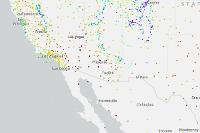

In [6]:
# Historical Temperature Averages
temp_id = 'ed59d3b4a8c44100914458dd722f054f'
temp = gis.content.get(temp_id)
display(temp)

In [7]:
# Access the feature layer at county level
temp_layer = temp.layers[0]
temp_sdf = temp_layer.query().sdf

# to geodataframe
temp_gdf = geopandas.GeoDataFrame(temp_sdf, geometry= temp_sdf['SHAPE'], crs="EPSG:4326")
temp_gdf = gpd.sjoin(temp_gdf, dem_gdf[['geometry']], how="inner", op="intersects")

<AxesSubplot:>

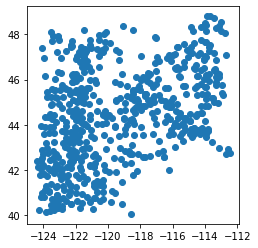

In [8]:
temp_gdf.plot()

In [9]:
# calculate the yearly average Fahrenheit temperature
temp_gdf['Year_TAVG_F'] = temp_gdf[['Jan_TAVG_F', 'Feb_TAVG_F', 'Mar_TAVG_F', 'Apr_TAVG_F', 'May_TAVG_F',
                                    'Jun_TAVG_F', 'Jul_TAVG_F', 'Aug_TAVG_F', 'Sep_TAVG_F', 'Oct_TAVG_F',
                                    'Nov_TAVG_F', 'Dec_TAVG_F']].mean(axis=1)

In [10]:
# get the nearest temperature point
def mean_temp_calc(dem):
    distances = temp_gdf.distance(dem.geometry).sort_values()
    nearest_point = temp_gdf.loc[distances.index[0]]
    return nearest_point.Year_TAVG_F
# assign point to county projections
# record time
start_time = time.time()
dem_gdf['Year_TAVG_F'] = dem_gdf.apply(mean_temp_calc, axis=1)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 109.31978511810303 seconds


<AxesSubplot:>

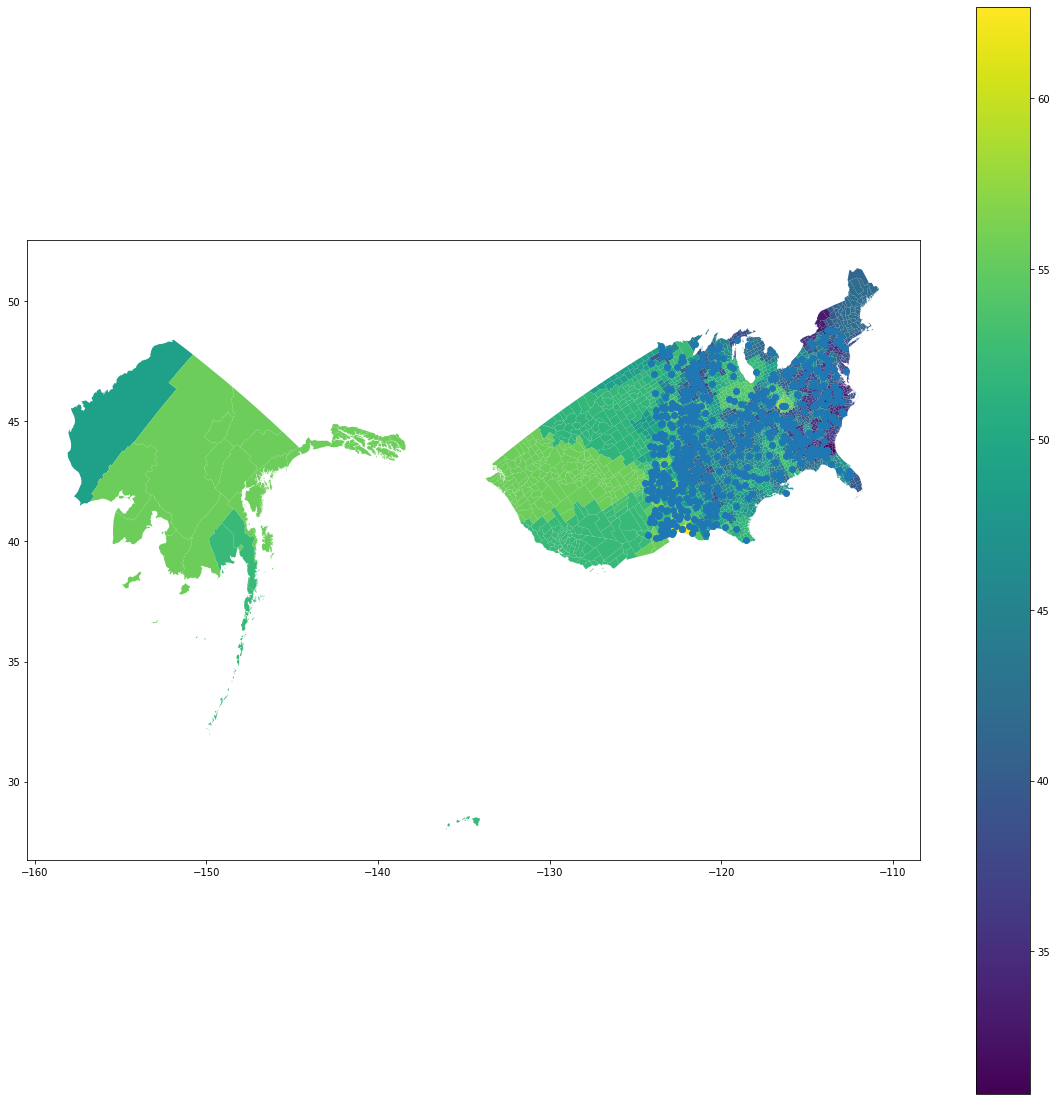

In [14]:
ax = dem_gdf.plot(figsize=(20,20), column='Year_TAVG_F', legend=True)
temp_gdf.plot(ax=ax)

## Data Cleaning

Data Exploration and Cleaning:
- Explore the dataset to understand its structure and variables.
- Extract geometries by census tract or county.

Spatial Visualization:
- Utilize ArcGIS modules to create spatial visualizations of key metrics.
- Generate maps displaying Housing Affordability Index, Unemployment Rate, and Median Home Value at the census tract level.

Affordability Analysis:
- Calculate the Housing Affordability Index for each location using relevant metrics.
- dentify areas with a high affordability index, indicating more affordable housing.

Housing Cost-to-Income Ratio:
- Calculate the housing cost-to-income ratio for each location.
- Identify areas with a low ratio, indicating better financial feasibility for potential homebuyers.

Spatial Overlay:
- Use ArcGIS to perform spatial overlay operations to combine different layers of information.
- Overlay the affordability index, future price predictions, and housing cost-to-income ratio to identify areas that meet multiple criteria.

Location Ranking:
- Develop a scoring system to rank locations based on the combination of affordability, future price potential, and housing cost-to-income ratio.
- Create buffers and visualize to see the extent of most suitable areas to buy a house


## Descriptive Statistics

Explore the data using maps, charts, and common descriptive statistics. Sample questions you can try to answer: is there spatial autocorrelation in the data? Are you dealing with random point patterns? What is the spatial mean and standard distance? Or why the above questions are not relevant to your research theme and the data?
(a combination of markdown and documented code cells)

In [13]:
map1 = gis.map("USA")
map1.add_layer(dem_layer)
map1.legend=True
map1

MapView(layout=Layout(height='400px', width='100%'), legend=True)

Let's identify some variables of interest within the Esri Demographics Spatial DataFrame.
- 'VACANT_CY': An estimate of the number of vacant homes. This will be transformed into the percentage of vacant homes by divifing by the total number of homes (TOTHU_CY) to account for differing housing densities.
    - This variable is interesting, because it can be used to gauge the level of home availability. Low vacancy could indicate a competitive housing market.
- 'HAI_CY': Housing Affordability Index. HAI values greater than 100 indicate increasing affordability; HAI values less than 100 indicate areas where homes are less affordable and median income might be insufficient to purchase a median-valued home. This will be transformed by normalization.
    - This variable is key, because it can be used to gauge whether homes are affordable which is the main target of our investigation.
- 'UNEMPRT_CY': An estimate of the unemployment rate of population age 16+. This will be transformed by normalization.
    - This variable is interesting, because it could be a good indicator for wealth and job availability in a specific geographic area. It is also a good tell for the state of the economy in said area.
- 'PCIGRWCYFY': An estimate for the Per Capita Income Annual Growth Rate between 2023 and 2028. This will be transformed by normalization.
    - This variable is interesting, because it forecasts economic growth for the future. Buying a home is an investment, so choosing a location with a growing economy is important for home value.

## Analysis

Provide a general outline of your analysis (in a markdown), and then document it step by step as you code the solution. Please make sure that we can reproduce your analysis by running your notebook. As before, a diagram describing your workflow would be helpful. Please also reflect on how your actual analysis steps were different compared to your project proposal - or state that you didn’t deviate from the initial plan.
(a combination of markdown and documented code cells)
(at least 500 words)

## Summary of Results

Describe what you found, and why it is important; illustrate the findings with maps/charts reflecting your results.
(a combination of markdown and documented code cells)
(200 words)

## Discussion 

The discussion should include the following parts:
1) Discuss your findings with respect to the literature sources in section 3. What do the results mean in the context of what is already known? What is new? Does it validate what was found in literature? How do your results improve our understanding of the problem?

2) Of particular importance is a discussion of any trade-offs and decision points that you had to consider. This may include a discussion of any performance issues, width of buffers you applied, projections you chose, spatial operations you used, machine learning techniques, and other issues we discussed in class.
(this can be done as a markdown, at least 200 words)

## Conclusion and Future Work

Did you manage to completely answer your initial research question? If not, what additional data and additional analysis steps can you think of? Can your approach be extended to other areas or topics, and use additional datasets? How do you expect the results to be used and by whom? (a markdown cell, at least 200 words)